Accuracy: 0.5
Confusion Matrix:
[[60 40]
 [60 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       100
           1       0.50      0.40      0.44       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200



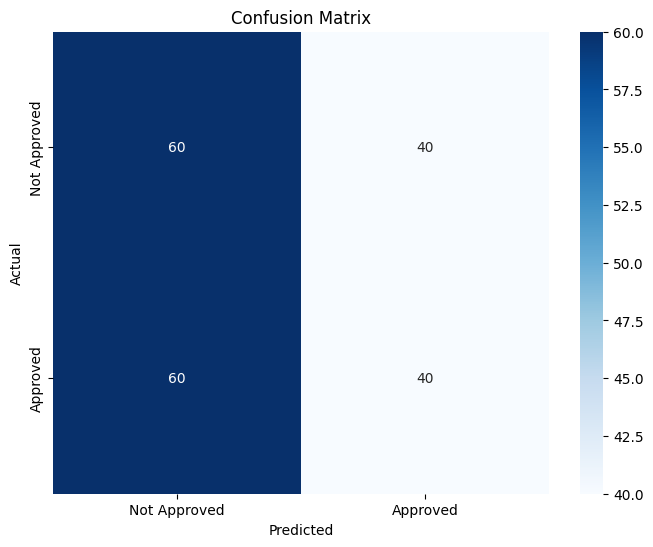

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic features
data = {
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Married': np.random.choice(['Yes', 'No'], n_samples),
    'Education': np.random.choice(['Graduate', 'Not Graduate'], n_samples),
    'Self_Employed': np.random.choice(['Yes', 'No'], n_samples),
    'ApplicantIncome': np.random.randint(1000, 50000, n_samples),
    'CoapplicantIncome': np.random.randint(0, 30000, n_samples),
    'LoanAmount': np.random.randint(100, 600, n_samples),
    'Loan_Status': np.random.choice(['Y', 'N'], n_samples)
}

df = pd.DataFrame(data)

# Convert categorical variables to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Features and labels
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()